<a href="https://colab.research.google.com/github/rmfpdlxmtidl/MachineLearningAssignments/blob/master/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

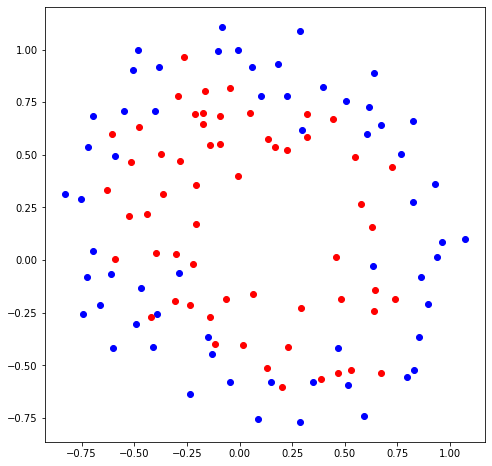

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from decimal import Decimal

# Logistic regression
def sigmoid(z):
  return 1 / (1 + np.exp(-0.1 * z))

# g(x, y, theta)
def g(X, theta):
  return theta[0] + theta[1] * (X[0] - 0.25) * (X[0] - 0.25) + theta[2] * (X[1] - 0.25) * (X[1] - 0.25)

# Derivative of g(x, y, theta) by theta_k
def dg_dtheta_k(X, k):
  if(k == 0):
    return 1
  else:
    return (X[k - 1] - 0.25) * (X[k - 1] - 0.25)

# Objective Function
def J(theta, data):
  sigma = 0
  for i in data:
    z = g(i, theta)
    sigma += -int(i[2]) * log(sigmoid(z)) - (1 - int(i[2])) * log(1 - sigmoid(z))
  return (1 / len(data)) * sigma

# Derivative of Objective Function by theta_k
def dJ_dtheta_k(theta, data, k):
  sigma = 0
  for i in data:
    z = g(i, theta)
    sigma += (sigmoid(z) - i[2]) * dg_dtheta_k(i, k)
  return (1 / (10 * len(data))) * sigma

# determine whether theta is converged
def is_converged(theta, next_theta):
  for i in range(len(theta)):
    if(Decimal(theta[i]) != Decimal(next_theta[i])):
      return False
  return True

# the training accuracy is computed by (number of correct predictionstotal) / (number of predictions)
def get_training_accuracy(theta, data):
  correct = 0
  for i in data:
    if(g(i, theta) >= 0 and i[2] == 1 or g(i, theta) < 0 and i[2] == 0):
      correct += 1
  return correct / len(data)

# load the training data file ('data-nonlinear.txt')
data = np.genfromtxt("drive/My Drive/Colab Notebooks/Machine Learning/Assignment 07/data-nonlinear.txt", delimiter=',')

# each row (x_i,y_i,l_i) of the data consists of a 2-dimensional point (x,y) with its label l
# x,y ∈ R
pointX  = data[:, 0]
pointY  = data[:, 1]
# l ∈ {0,1}
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]



# you can use any initial conditions θ = (θ0,θ1, ..., θk-1), for all k
theta = np.array([0, -100, -200], float)

# you should choose a learning rate α in such a way that the convergence is achieved
learning_rate = 1

# the i-th theta, training error J(θ0,θ1,θ2), and training accuracy
theta0_i = [theta[0]]
theta1_i = [theta[1]]
theta2_i = [theta[2]]
J_i = [J(theta, data)]
training_accuracy = [get_training_accuracy(theta, data)]

while True:
  # Gradient Descent
  # find optimal parameters θ using the training data
  next_theta = np.empty(3, float)
  next_theta[0] = theta[0] - learning_rate * dJ_dtheta_k(theta, data, 0)
  next_theta[1] = theta[1] - 100 * learning_rate * dJ_dtheta_k(theta, data, 1)
  next_theta[2] = theta[2] - 10 * learning_rate * dJ_dtheta_k(theta, data, 2)

  # break the loop if parameters are converged
  if(is_converged(theta, next_theta)):
    break

  # save the estimated parameters (θ0​,θ1​,θ2​) at every iteration of gradient descent
  theta0_i.append(theta[0])
  theta1_i.append(theta[1])
  theta2_i.append(theta[2])
  J_i.append(J(theta, data))
  training_accuracy.append(get_training_accuracy(theta, data))

  # update the theta
  theta = next_theta

print(len(theta0_i))
print('Theta:', theta)

# 1. Plot the training data [1pt]
print('1. Plot the training data points (x,y) with their labels l in colors')
print('(blue for label 0 and red for label 1)')
plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, color='blue')
plt.scatter(pointX1, pointY1, color='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


print('- Plot the estimated parameters θ at every iteration of gradient descent until convergence')
print('- the colors for the parameters (θ0,θ1,θ2) should be red, green, blue, respectively')
plt.figure(figsize=(8, 8))
x = range(len(theta0_i))
plt.plot(x, theta0_i, color='red')
plt.plot(x, theta1_i, color='green')
plt.plot(x, theta2_i, color='blue')
plt.show()

# 3. Plot the training error [3pt]
print('3. Plot the training error J(θ) at every iteration of gradient descent')
print('until convergence (in blue color)')
plt.figure(figsize=(8, 8))
plt.plot(x, J_i, color='blue')
plt.show()

# 4. Plot the training accuracy [3pt]
print('4. Plot the training accuracy at every iteration of gradient descent')
print('until convergence (in red color)')
plt.figure(figsize=(8, 8))
plt.plot(x, training_accuracy, color='red')
plt.show()

# 5. Write down the final training accuracy [5pt]
print('5. Present the final training accuracy in number (%) at convergence')
print('The final training accuracy:', training_accuracy[-1] * 100, '%\n')

# 6. Plot the optimal classifier superimposed on the training data [5pt]
print('6. Plot the boundary of the optimal classifier at convergence (in green color)')
plt.figure(figsize=(8, 8))

# plot the training data points (x,y) with their labels l
# in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
plt.scatter(pointX0, pointY0, color='blue')
plt.scatter(pointX1, pointY1, color='red')

# the boundary of the classifier is defined by {(x,y) ∣ g(x,y;θ) = 0}
X = np.arange(0.25 - sqrt(theta[0]/-theta[1]) + 0.00001, 0.25 + sqrt(theta[0]/-theta[1]), 0.00001)
Y = 0.25 + np.sqrt((-theta[0] - theta[1] * (X - 0.25) * (X - 0.25)) / theta[2])
plt.plot(X, Y, color='green')
Y = 0.25 - np.sqrt((-theta[0] - theta[1] * (X - 0.25) * (X - 0.25)) / theta[2])
plt.plot(X, Y, color='green')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


